## Dane

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = np.genfromtxt("./data/145244-ensembles.txt", skip_header=1)
data.shape

(10000, 126)

In [3]:
names = "dissim	el0	el1	el2	el3	el4	el5	el6	el7	el8	el9	el10	el11	el12	el13	el14	el15	el16	el17	el18	el19	el20	el21	el22	el23	el24	el25	el26	el27	el28	el29	el30	el31	max_el	diff	diffplus	diffminus	std	diff/std**0.2	diff/std**0.6	diff/std**1	diff/std**1.4	diff/std**2	maxmiddle	similarwindow_4.0	similarwindow_4.1	similarwindow_4.2	similarwindow_4.3	stat0	stat1	stat2	stat3	stat4	stat5	stat6	stat7	stat8	stat9	stat10	stat11	stat12	stat13	stat14	stat15	stat16	stat17	stat18	stat19	stat20	stat21	stat22	stat23	stat24	stat25	stat26	stat27	stat28	stat29	stat30	stat31	stat32	stat33	stat34	stat35	stat36	stat37	stat38	stat39	stat40	stat41	stat42	stat43	stat44	stat45	stat46	stat47	stat48	stat49	stat50	stat51	stat52	stat53	stat54	stat55	stat56	stat57	stat58	stat59	stat60	stat61	stat62	stat63	stat64	stat65	stat66	stat67	stat68	stat69	stat70	stat71	stat72	stat73	stat74	stat75	stat76	class"
names = names.split("\t")

In [4]:
print(data.shape, np.array(names).shape)

(10000, 126) (126,)


C:\Users\Marcin\AppData\Local\Temp\ipykernel_54100\2803668442.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


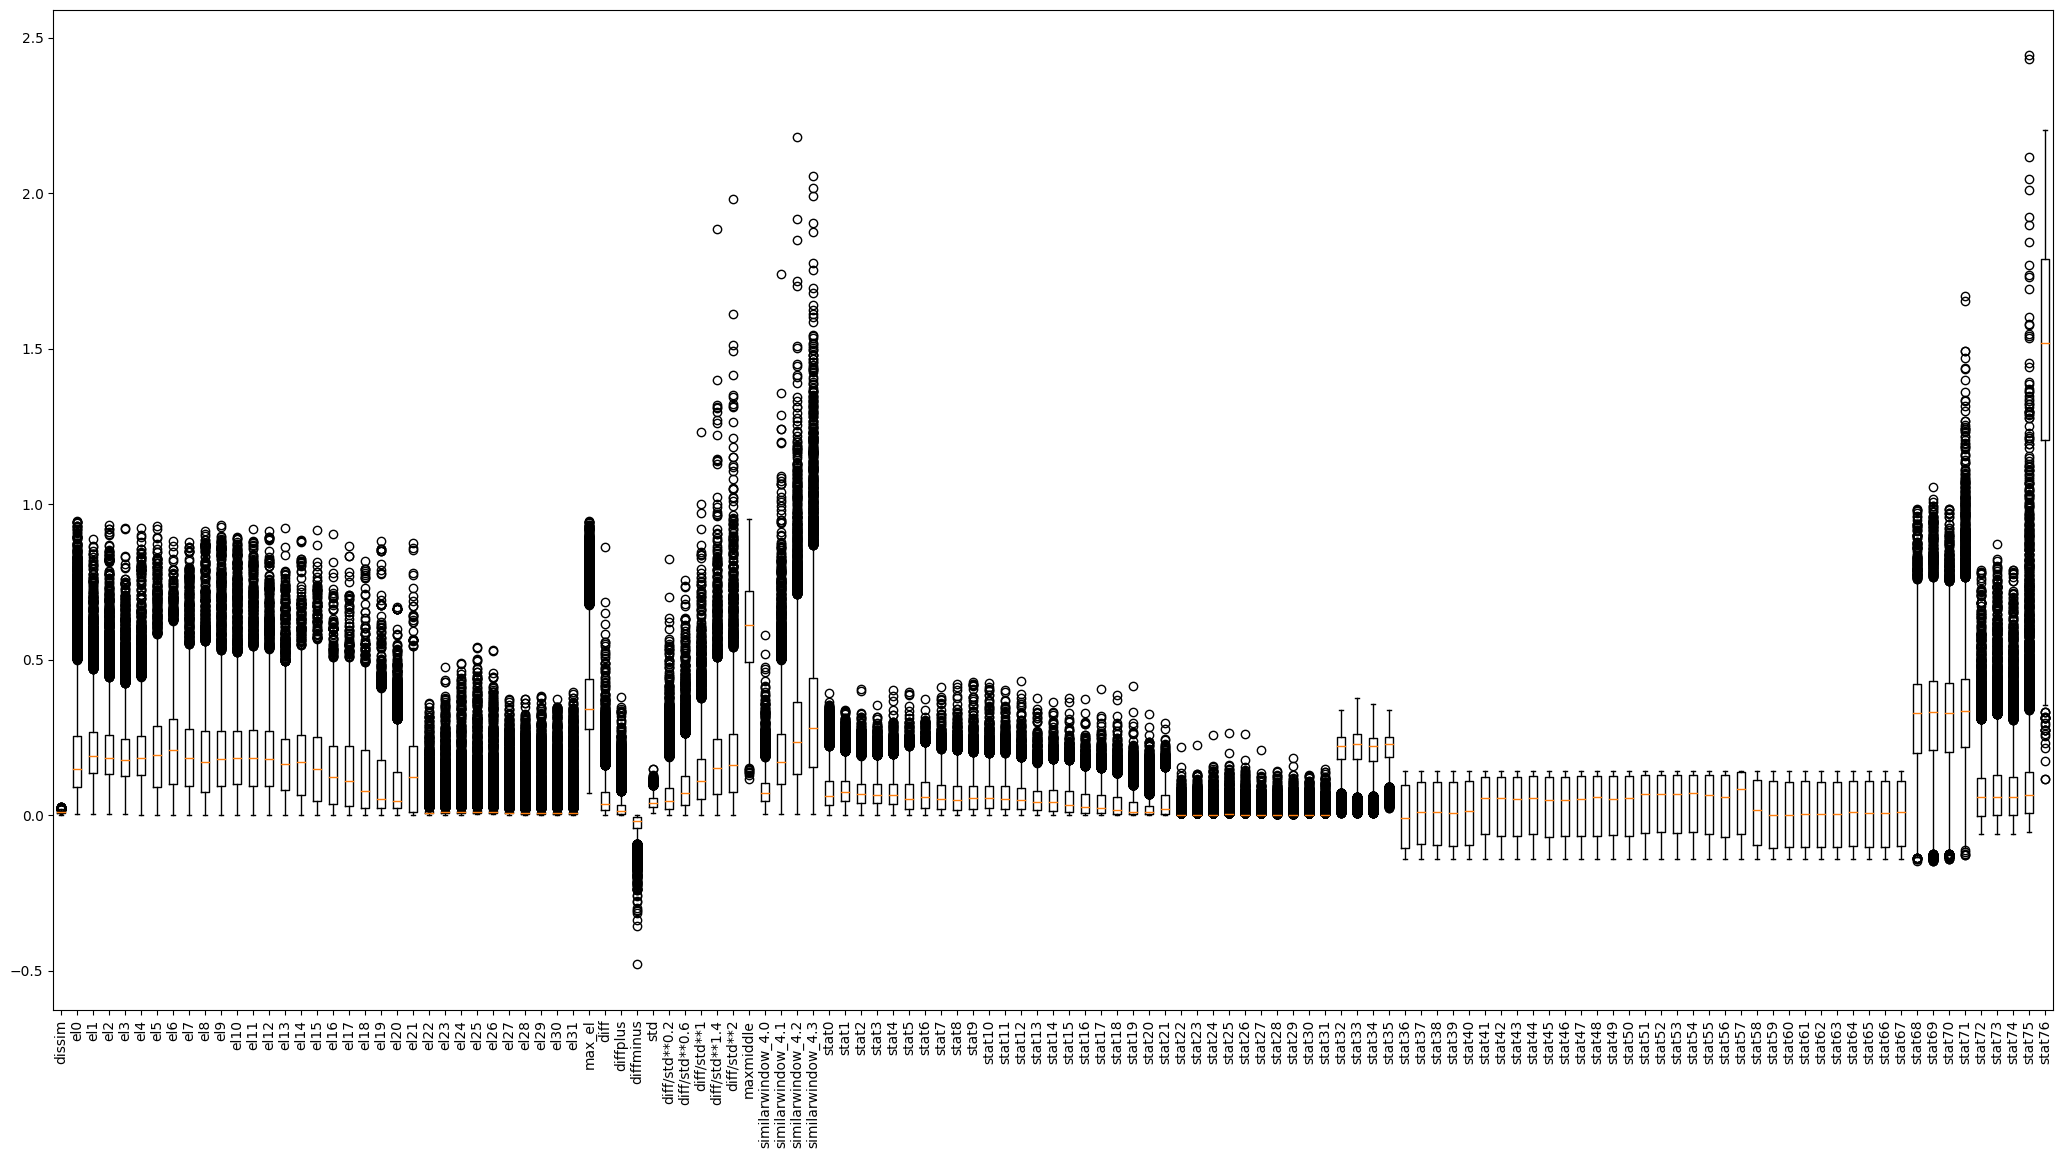

In [5]:
%matplotlib inline
fig = plt.figure(figsize =(20, 10))

ax = fig.add_axes([0, 0, 1, 1])

plt.xticks(rotation=90)
ax.boxplot(data[:, :-1], labels=names[:-1])

plt.tight_layout()

In [8]:
np.unique(data[:,-1], return_counts=True)

(array([0., 1.]), array([9560,  440], dtype=int64))

In [24]:
import pandas as pd

data_pd = pd.DataFrame(data)
data_pd.columns = names
data_pd.head()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
0,0.005953,0.37661,0.20369,0.18400,0.14431,0.097591,0.141250,0.066986,0.097651,0.061231,...,0.29824,0.29738,0.24546,0.28642,0.066857,0.063547,0.035192,0.060780,1.9335,0.0
1,0.006095,0.41151,0.20787,0.21653,0.14329,0.105470,0.139440,0.069043,0.098705,0.051255,...,0.25433,0.21630,0.23483,0.23751,0.043243,0.035262,0.028505,0.037674,1.9207,0.0
2,0.006014,0.41839,0.20371,0.21420,0.14873,0.104980,0.148790,0.066316,0.080039,0.053000,...,0.24131,0.20540,0.24974,0.23876,0.038066,0.020450,0.036292,0.037065,1.8930,0.0
3,0.005861,0.44464,0.21057,0.20847,0.16258,0.094303,0.078257,0.077412,0.092866,0.059640,...,0.23888,0.14775,0.19748,0.21215,0.032744,-0.011555,0.015672,0.026152,1.9624,0.0
4,0.005831,0.44740,0.21517,0.21248,0.16257,0.097892,0.078237,0.080039,0.094786,0.043494,...,0.23312,0.15068,0.20147,0.20560,0.030109,-0.006486,0.017433,0.021298,1.9373,0.0


In [28]:
X = data_pd.iloc[:,:-1]
y = data_pd.iloc[:,-1]

## PCA

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# scaled_data = StandardScaler().fit_transform(data[:,:-1])
pca = PCA(n_components=3)
principal_data = pca.fit_transform(data[:,:-1])
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

principal_data_Df = pd.DataFrame(data = principal_data
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])


[0.32716694 0.12121047 0.07653965]
0.5249170637231443


Text(0.5, 0.92, 'PCA n_components=3')

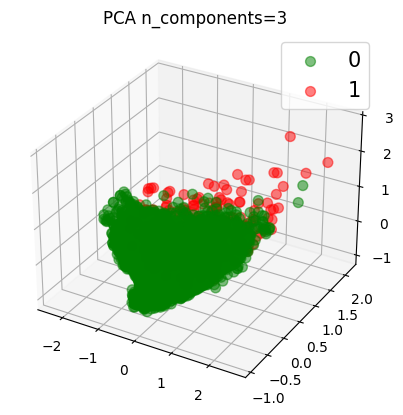

In [21]:

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
# plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
# plt.xlabel('Principal Component - 1',fontsize=20)
# plt.ylabel('Principal Component - 2',fontsize=20)
# plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['g', 'r']
labels=['0', '1']
shapes = ['o', 'o']
for target, color, label, shape in zip(targets,colors, labels, shapes):
    indicesToKeep = data[:,-1] == target
    ax.scatter(principal_data_Df.loc[indicesToKeep, 'principal component 1']
               , principal_data_Df.loc[indicesToKeep, 'principal component 2'], principal_data_Df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50, label=label, alpha=0.5, marker=shape)

plt.legend(prop={'size': 15})

plt.title("PCA n_components=3")


[0.32716694 0.12121047]
0.4483774107570116


Text(0.5, 1.0, 'PCA n_components=2')

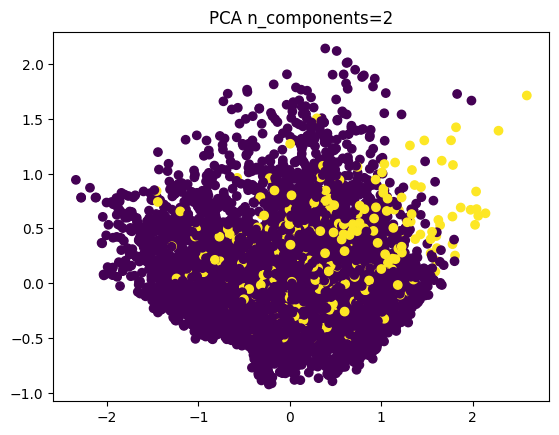

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[:,:-1])
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
plt.scatter(*X_pca.T, c=data[:,-1])
plt.title("PCA n_components=2")

## Metody zespołowe

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier

classes = dict(
    ada_boost_gnb=lambda: AdaBoostClassifier(GaussianNB()),
    ada_boost_tree=lambda: AdaBoostClassifier(DecisionTreeClassifier()),
    voting_tree_gnb=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())], n_jobs=4),
    stacking_tree_gnb=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())], n_jobs=4),
    voting_gnb_qda=lambda: VotingClassifier([('qda', QuadraticDiscriminantAnalysis()), ('gnb', GaussianNB())], n_jobs=4),
    stacking_gnb_qda=lambda: StackingClassifier([('qda', QuadraticDiscriminantAnalysis()), ('gnb', GaussianNB())], n_jobs=4),
    voting_tree_gnb_svc=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('svc', SVC())], n_jobs=4),
    stacking_tree_gnb_svc=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('svc', SVC())], n_jobs=4),
    voting_tree_gnb_qda=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('qda', QuadraticDiscriminantAnalysis())], n_jobs=4),
    stacking_tree_gnb_qda=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('qda', QuadraticDiscriminantAnalysis())], n_jobs=4),
    random_forest=lambda: RandomForestClassifier(n_jobs=4),
)

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2021)
res = []
for name, cls in classes.items():
    for tr_idx, te_idx in fold.split(X, y):
        for norm in [False, True]:
            X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
            y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]
            if norm:
                scaler = StandardScaler()
                X_tr = scaler.fit_transform(X_tr)
                X_te = scaler.transform(X_te)
            model = cls()
            model.fit(X_tr, y_tr)
            Y_te = model.predict(X_te)
            res += [dict(name=name, gmean=geometric_mean_score(y_te, Y_te), norm=norm)]
res = pd.DataFrame(res)
res

,name,gmean,norm
0,ada_boost_gnb,0.638263,False
1,ada_boost_gnb,0.396561,True
2,ada_boost_gnb,0.736680,False
3,ada_boost_gnb,0.589950,True
4,ada_boost_gnb,0.336571,False
...,...,...,...
215,random_forest,0.620606,True
216,random_forest,0.655753,False
217,random_forest,0.655753,True
218,random_forest,0.655063,False


<AxesSubplot: xlabel='name'>

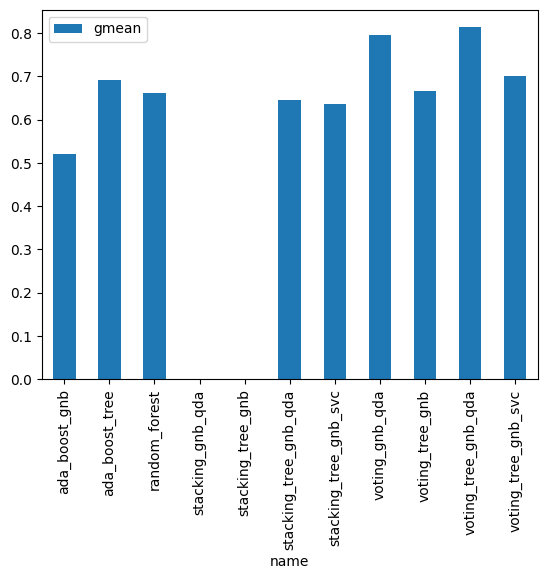

In [52]:
first = res.loc[res["norm"] == False].drop(columns = "norm")

# first

second = first.groupby(["name"]).mean()

second

second.plot.bar()

## 2 eksperyment

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier

classes = dict(
    ada_boost=lambda: AdaBoostClassifier(),
    # ada_boost_tree=lambda: AdaBoostClassifier(DecisionTreeClassifier()),
    # voting_tree_gnb=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())], n_jobs=4),
    # stacking_tree_gnb=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())], n_jobs=4),
    # voting_gnb_qda=lambda: VotingClassifier([('qda', QuadraticDiscriminantAnalysis()), ('gnb', GaussianNB())], n_jobs=4),
    # stacking_gnb_qda=lambda: StackingClassifier([('qda', QuadraticDiscriminantAnalysis()), ('gnb', GaussianNB())], n_jobs=4),
    # voting_tree_gnb_svc=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('svc', SVC())], n_jobs=4),
    # stacking_tree_gnb_svc=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('svc', SVC())], n_jobs=4),
    voting_tree_gnb_qda=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('qda', QuadraticDiscriminantAnalysis())], n_jobs=4),
    stacking_tree_gnb_qda=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('qda', QuadraticDiscriminantAnalysis())], n_jobs=4),
    random_forest=lambda: RandomForestClassifier(n_jobs=4),
)

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2021)
res = []
for name, cls in classes.items():
    for tr_idx, te_idx in fold.split(X, y):
        for norm in [False, True]:
            X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
            y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]
            if norm:
                scaler = StandardScaler()
                X_tr = scaler.fit_transform(X_tr)
                X_te = scaler.transform(X_te)
            model = cls()
            model.fit(X_tr, y_tr)
            Y_te = model.predict(X_te)
            res += [dict(name=name, gmean=geometric_mean_score(y_te, Y_te), norm=norm)]
res = pd.DataFrame(res)
res

,name,gmean,norm
0,ada_boost,0.689402,False
1,ada_boost,0.689402,True
2,ada_boost,0.635239,False
3,ada_boost,0.635239,True
4,ada_boost,0.652991,False
...,...,...,...
75,random_forest,0.620606,True
76,random_forest,0.655753,False
77,random_forest,0.656097,True
78,random_forest,0.671727,False


C:\Users\Marcin\AppData\Local\Temp\ipykernel_54100\1919857008.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='name', y='gmean', hue='scaler', ci='sd', data=res)


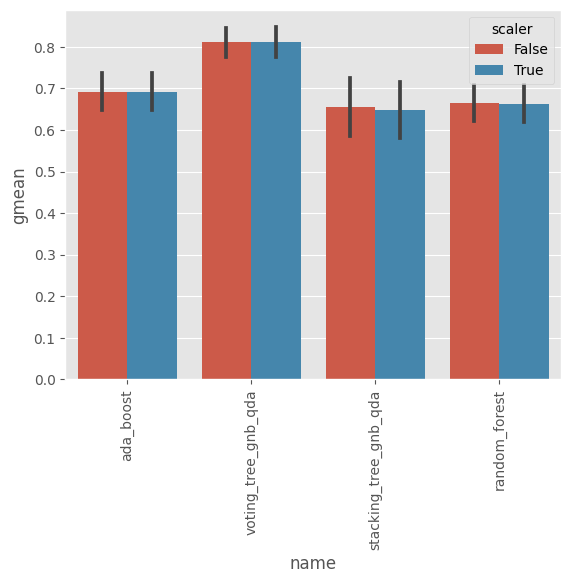

In [57]:

import seaborn as sns
plt.style.use('ggplot')
sns.barplot(x='name', y='gmean', hue='scaler', ci='sd', data=res)
plt.xticks(rotation=90)
plt.show()

In [55]:
res.rename(columns = {"norm": "scaler"}, inplace = True)

In [56]:
res

,name,gmean,scaler
0,ada_boost,0.689402,False
1,ada_boost,0.689402,True
2,ada_boost,0.635239,False
3,ada_boost,0.635239,True
4,ada_boost,0.652991,False
...,...,...,...
75,random_forest,0.620606,True
76,random_forest,0.655753,False
77,random_forest,0.656097,True
78,random_forest,0.671727,False


## Fine tuning

In [75]:
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_validate, RandomizedSearchCV

grid = dict(
    vote__tree__max_depth=[2, 5, 10, 20, None],
    # vote__tree__max_features=['sqrt', 'log2', None],
    # vote__tree__class_weights=[None, 'balanced', {0: 0.1, 1: 0.9}],
    vote__tree__min_samples_leaf=[2, 3, 4, 5],
    vote__gnb__var_smoothing=[1e-9, 1e-8, 1e-7],
    vote__qda__reg_param=[0, 0.5, 1],
    vote__voting=['soft', 'hard'],
)

iters = 20
k_fold = 10
args = dict(cv=k_fold, n_jobs=4, scoring=dict(gmean=make_scorer(geometric_mean_score)))
        
def Base(class_weight):
    return VotingClassifier([('tree', DecisionTreeClassifier(class_weight=class_weight)), ('gnb', GaussianNB()), ('qda', QuadraticDiscriminantAnalysis())])
            
tree = cross_validate(DecisionTreeClassifier(), X, y, **args)
gnb = cross_validate(GaussianNB(), X, y, **args)
qda = cross_validate(QuadraticDiscriminantAnalysis(), X, y, **args)

# model = Pipeline([
#     ( 'scale', StandardScaler() ),
#     ( 'vote', Base(class_weight=None) ),
# ])
# base_unbalanced = cross_validate(model, X, y, **args)
            
# model = Pipeline([
#     ( 'scale', StandardScaler() ),
#     ( 'vote', Base(class_weight='balanced') ),
# ])
# base_balanced = cross_validate(model, X, y, **args)

# model = Pipeline([
#     ( 'scale', StandardScaler() ),
#     ( 'vote', Base(class_weight=None) ),
# ])

model = Pipeline([
    ( 'scale', StandardScaler() ),
    ( 'vote', Base(class_weight=None) ),
])
base_unbalanced = cross_validate(model, X, y, **args)
search = GridSearchCV(model, grid, refit='gmean', **args)
tuned_unbalanced = search.fit(X, y)

model = Pipeline([
    ( 'scale', StandardScaler() ),
    ( 'vote', Base(class_weight='balanced') ),
])
search = GridSearchCV(model, grid, refit='gmean', **args)
tuned_balanced = search.fit(X, y)

In [76]:
print(tuned_balanced.best_params_)
print(tuned_unbalanced.best_params_)

{'vote__gnb__var_smoothing': 1e-08, 'vote__qda__reg_param': 0, 'vote__tree__max_depth': 5, 'vote__tree__min_samples_leaf': 4, 'vote__voting': 'soft'}
{'vote__gnb__var_smoothing': 1e-09, 'vote__qda__reg_param': 0, 'vote__tree__max_depth': None, 'vote__tree__min_samples_leaf': 3, 'vote__voting': 'soft'}


,name,gmean,gmean_std
0,VoteClassifier,0.798193,0.070526
1,VoteClassifier - tuned,0.807152,0.059464
2,VoteClassifier - tuned and balanced,0.824893,0.051802


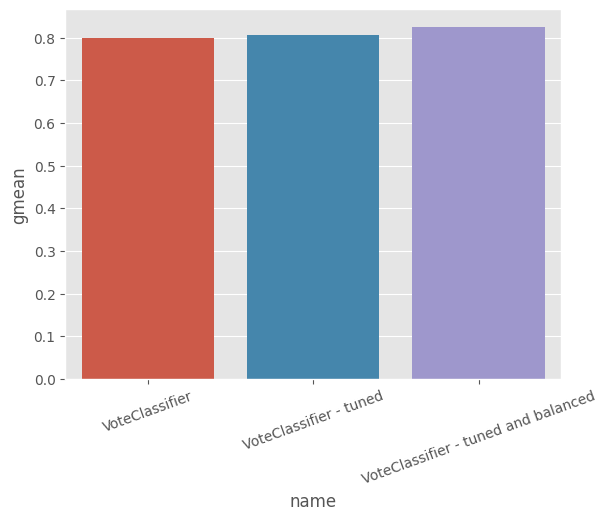

In [91]:

data = pd.DataFrame([
    #dict(name='tree', gmean=tree['test_gmean'].mean()),
    #dict(name='gnb', gmean=gnb['test_gmean'].mean()),
    #dict(name='qda', gmean=qda['test_gmean'].mean()),
    dict(name='VoteClassifier', gmean=base_unbalanced['test_gmean'].mean(), gmean_std=base_unbalanced['test_gmean'].std()),
    dict(name='VoteClassifier - tuned', gmean=tuned_unbalanced.cv_results_['mean_test_gmean'].max(), gmean_std=tuned_unbalanced.cv_results_['std_test_gmean'].min()),
    #dict(name='base + balance', gmean=base_unbalanced['test_gmean'].mean()),
    dict(name='VoteClassifier - tuned and balanced', gmean=tuned_balanced.cv_results_['mean_test_gmean'].max(), gmean_std=tuned_balanced.cv_results_['std_test_gmean'].min()),
])
sns.barplot(x='name', y='gmean', data=data)
# #plt.xticks(rotation=-45)
# plt.ylim(0.7)
# plt.errorbar(x=[0, 1, 2], y=data.gmean, yerr=data.gmean_std, fmt='none', c='k', lw=2)
plt.xticks(rotation=20)
data

## Macierze pomyłek

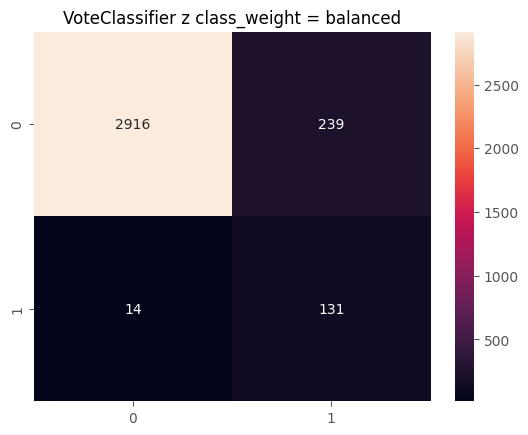

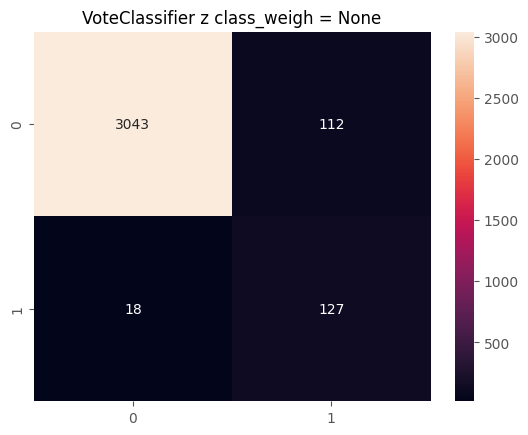

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

classes = [tuned_balanced.best_estimator_,
tuned_unbalanced.best_estimator_]

i = 0
# for cls in classes:
#     X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
#     fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#     model = cls
#     # model.fit(X_train, y_train)
#     cm = confusion_matrix(y_te, model.predict(X_te)) 
#     sns.heatmap(cm, annot=True, fmt='g', ax=axs[0])
#     axs[0].set_title(f'VoteClassifier z {"class_weigh = None" if i == 1 else "class_weight = balanced"}', fontsize=12)
#     scaler = StandardScaler()
#     X_tr = scaler.fit_transform(X_tr)
#     X_te = scaler.transform(X_te)
#     # model = preprocess_scaler(cls())
#     # model.fit(X_train, y_train)
#     cm = confusion_matrix(y_te, model.predict(X_te)) 
#     sns.heatmap(cm, annot=True, fmt='g', ax=axs[1])
#     axs[1].set_title(f'VoteClassifier z {"class_weigh = None" if i == 1 else "class_weight = balanced"} + StandardScaler', fontsize=12)
#     i += 1
#     plt.show()

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, stratify=y)
for cls in classes:
    model = cls
    # model.fit(X_train, y_train)
    cm = confusion_matrix(y_te, model.predict(X_te)) 
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'VoteClassifier z {"class_weigh = None" if i == 1 else "class_weight = balanced"}', fontsize=12)
    # scaler = StandardScaler()
    
    i += 1
    plt.show()